In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error

In [2]:
data = pd.read_excel('TS_Data.xlsx')

In [3]:
data = data.tail(-1)

In [4]:
data = data[["Date","Marketing spends"]]
data.columns = ["Date","Value"]

In [5]:
data

,Date,Value
1,2017-01-01,176732
2,2017-02-01,180486
3,2017-03-01,180455
4,2017-04-01,185070
5,2017-05-01,195915
6,2017-06-01,194849
7,2017-07-01,175999
8,2017-08-01,167606
9,2017-09-01,204624
10,2017-10-01,208619


In [6]:
data.isnull().sum()

Date     0
Value    0
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.index = data['Date']

In [9]:
data = data.drop(columns=['Date'])

In [10]:
data

,Value
Date,
2017-01-01,176732
2017-02-01,180486
2017-03-01,180455
2017-04-01,185070
2017-05-01,195915
2017-06-01,194849
2017-07-01,175999
2017-08-01,167606
2017-09-01,204624


In [11]:
result = seasonal_decompose(data['Value'])

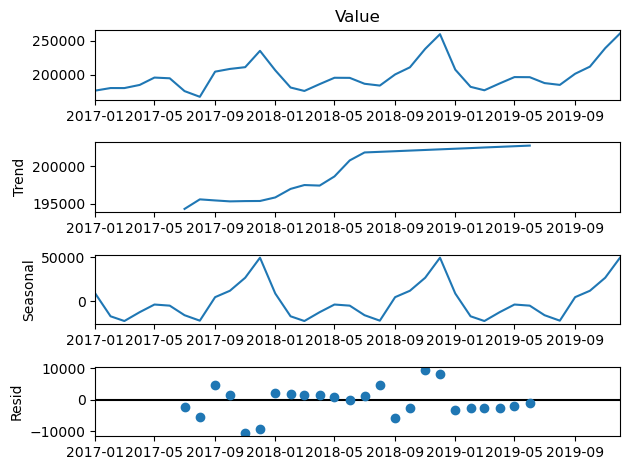

In [12]:
result.plot()
plt.show()

In [13]:
data['dt'] = data.index

In [14]:
type(data['dt'])

pandas.core.series.Series

In [15]:
data['dt'] = pd.to_datetime(data['dt'])

In [16]:
train = data[data['dt'].dt.year<2019]
test = data[data['dt'].dt.year>2018]

In [17]:
train.drop(columns=['dt'], inplace = True)
test.drop(columns=['dt'], inplace = True)

/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_25640/4112128423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['dt'], inplace = True)
/var/folders/cv/kmsppstx0d9281mtbqrrgl6c0000gn/T/ipykernel_25640/4112128423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['dt'], inplace = True)


In [28]:
data_smooth = pd.DataFrame(range(1,37), columns=['X'])


In [32]:
data['X'] = data_smooth['X'].values

In [33]:
data

,Value,dt,X
Date,,,
2017-01-01,176732,2017-01-01,1
2017-02-01,180486,2017-02-01,2
2017-03-01,180455,2017-03-01,3
2017-04-01,185070,2017-04-01,4
2017-05-01,195915,2017-05-01,5
2017-06-01,194849,2017-06-01,6
2017-07-01,175999,2017-07-01,7
2017-08-01,167606,2017-08-01,8
2017-09-01,204624,2017-09-01,9


In [37]:
data['Value'].rolling(2).mean().values

array([     nan, 178609. , 180470.5, 182762.5, 190492.5, 195382. ,
       185424. , 171802.5, 186115. , 206621.5, 209914. , 223228.5,
       220910. , 193927.5, 178754. , 181252.5, 190951. , 195546.5,
       191134. , 185466. , 192322.5, 205758. , 224581. , 248956. ,
       233664. , 194927.5, 179754. , 182252.5, 191951. , 196546.5,
       192134. , 186466. , 193322.5, 206758. , 225581. , 249956. ])

# SIMPLE MOVING AVERAGE

In [59]:
result = []
colum_index = 3
for i in [1,2,3,4,5]:
    column_name = 'SMA_K_'+str(i)
    data[column_name] = data['Value'].rolling(i).mean().values
    print("MAPE for SMA with K = ",i)
    print(mean_absolute_percentage_error(data.iloc[i-1:,0], data.iloc[i-1:,colum_index]))
    mape_ = mean_absolute_percentage_error(data.iloc[i-1:,0], data.iloc[i-1:,colum_index])
    colum_index = colum_index +1
    result.append(['SMA', i, mape_])

MAPE for SMA with K =  1
0.0
MAPE for SMA with K =  2
0.03265352013201572
MAPE for SMA with K =  3
0.05941531977966369
MAPE for SMA with K =  4
0.07455298945024523
MAPE for SMA with K =  5
0.0826114753196251


In [60]:
result

[['SMA', 1, 0.0],
 ['SMA', 2, 0.03265352013201572],
 ['SMA', 3, 0.05941531977966369],
 ['SMA', 4, 0.07455298945024523],
 ['SMA', 5, 0.0826114753196251]]

In [70]:
data

,Value,dt,X,SMA_K_1,SMA_K_2,SMA_K_3,SMA_K_4,SMA_K_5
Date,,,,,,,,
2017-01-01,176732,2017-01-01,1,176732.0,NaN,NaN,NaN,NaN
2017-02-01,180486,2017-02-01,2,180486.0,178609.0,NaN,NaN,NaN
2017-03-01,180455,2017-03-01,3,180455.0,180470.5,179224.333333,NaN,NaN
2017-04-01,185070,2017-04-01,4,185070.0,182762.5,182003.666667,180685.75,NaN
2017-05-01,195915,2017-05-01,5,195915.0,190492.5,187146.666667,185481.50,183731.6
2017-06-01,194849,2017-06-01,6,194849.0,195382.0,191944.666667,189072.25,187355.0
2017-07-01,175999,2017-07-01,7,175999.0,185424.0,188921.000000,187958.25,186457.6
2017-08-01,167606,2017-08-01,8,167606.0,171802.5,179484.666667,183592.25,183887.8
2017-09-01,204624,2017-09-01,9,204624.0,186115.0,182743.000000,185769.50,187798.6


In [68]:
data['Value'].rolling(2).apply(lambda x : (weights*x))

Date
2017-01-01         NaN
2017-02-01    178609.0
2017-03-01    180470.5
2017-04-01    182762.5
2017-05-01    190492.5
2017-06-01    195382.0
2017-07-01    185424.0
2017-08-01    171802.5
2017-09-01    186115.0
2017-10-01    206621.5
2017-11-01    209914.0
2017-12-01    223228.5
2018-01-01    220910.0
2018-02-01    193927.5
2018-03-01    178754.0
2018-04-01    181252.5
2018-05-01    190951.0
2018-06-01    195546.5
2018-07-01    191134.0
2018-08-01    185466.0
2018-09-01    192322.5
2018-10-01    205758.0
2018-11-01    224581.0
2018-12-01    248956.0
2019-01-01    233664.0
2019-02-01    194927.5
2019-03-01    179754.0
2019-04-01    182252.5
2019-05-01    191951.0
2019-06-01    196546.5
2019-07-01    192134.0
2019-08-01    186466.0
2019-09-01    193322.5
2019-10-01    206758.0
2019-11-01    225581.0
2019-12-01    249956.0
Name: Value, dtype: float64

In [75]:
list(range(1,i))

[1, 2, 3, 4]

In [ ]:
30
40
50


(40*0.8 + 30*0.2)/ (0.8+0.2)
(50*0.8 + 40*0.2)/ (0.8+0.2)

In [73]:
weights = [0.2,0.8]
data['Value'].rolling(2).apply(lambda x : (weights*x).sum() / sum(weights))

Date
2017-01-01         NaN
2017-02-01    179735.2
2017-03-01    180461.2
2017-04-01    184147.0
2017-05-01    193746.0
2017-06-01    195062.2
2017-07-01    179769.0
2017-08-01    169284.6
2017-09-01    197220.4
2017-10-01    207820.0
2017-11-01    210691.0
2017-12-01    230440.2
2018-01-01    212307.2
2018-02-01    186340.8
2018-03-01    177236.6
2018-04-01    184269.0
2018-05-01    193753.6
2018-06-01    195501.2
2018-07-01    188531.8
2018-08-01    184667.4
2018-09-01    197235.0
2018-10-01    208906.8
2018-11-01    232726.0
2018-12-01    255436.0
2019-01-01    218008.8
2019-02-01    187340.8
2019-03-01    178236.6
2019-04-01    185269.0
2019-05-01    194753.6
2019-06-01    196501.2
2019-07-01    189531.8
2019-08-01    185667.4
2019-09-01    198235.0
2019-10-01    209906.8
2019-11-01    233726.0
2019-12-01    256436.0
Name: Value, dtype: float64

# WEIGHTED MOVING AVERAGE


In [90]:
colum_index = 8
for i in [2,3,4,5]:
    column_name = 'WMA_K_'+str(i)
    
    weights = list(range(1,i+1))
    data[column_name] = data['Value'].rolling(len(weights)).apply(lambda x : (weights*x).sum() / sum(weights))
    
    
    print("MAPE for WMA with K = ",i)
    print(mean_absolute_percentage_error(data.iloc[i-1:,0], data.iloc[i-1:,colum_index]))
    mape_ = mean_absolute_percentage_error(data.iloc[i-1:,0], data.iloc[i-1:,colum_index])
    colum_index = colum_index +1
    result.append(['WMA', i, mape_])

MAPE for WMA with K =  2
0.02176901342134382
MAPE for WMA with K =  3
0.04073991244443097
MAPE for WMA with K =  4
0.05460433561643659
MAPE for WMA with K =  5
0.06383833307645177


In [91]:
result

[['SMA', 1, 0.0],
 ['SMA', 2, 0.03265352013201572],
 ['SMA', 3, 0.05941531977966369],
 ['SMA', 4, 0.07455298945024523],
 ['SMA', 5, 0.0826114753196251],
 ['WMA', 2, 0.02176901342134382],
 ['WMA', 3, 0.04073991244443097],
 ['WMA', 4, 0.05460433561643659],
 ['WMA', 5, 0.06383833307645177]]

# EXPONENTIAL MOVING AVERAGE

In [97]:
data['EMA_K_1'] = data['Value'].ewm(span = 2).mean()

In [98]:
print("MAPE for EMA with K = 1 ")
print(mean_absolute_percentage_error(data['Value'], data['EMA_K_1']))

MAPE for EMA with K = 1 
0.0250412684409537


In [99]:
result.append(['EMA', '1', mean_absolute_percentage_error(data['Value'], data['EMA_K_1'])])

In [102]:
result_df = pd.DataFrame(result,columns= ['Smoothing Method', 'K', 'MAPE'])

In [104]:
result_df.sort_values(by='MAPE')

,Smoothing Method,K,MAPE
0,SMA,1,0.000000
5,WMA,2,0.021769
9,EMA,1,0.025041
1,SMA,2,0.032654
6,WMA,3,0.040740
7,WMA,4,0.054604
2,SMA,3,0.059415
8,WMA,5,0.063838
3,SMA,4,0.074553
4,SMA,5,0.082611
